Some typical NumPy 'random' functions:

In [10]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.50659877 0.25298246]
 [0.02083268 0.61425964]
 [0.84948053 0.84500012]]
[-0.60250397 -0.74588173  0.66453261 -0.59549798  0.16233478]
[31  4 97 76 10 92 40 55 89 35]
[3 5 6]
[ 0.78182128  0.01752872 -1.07488564  0.32766239  0.55301809 -0.3208699
  1.95791418 -1.08543636  1.52505896  0.07699243]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
import pandas as pd
import numpy as np
import time

# Start time measurement for pandas
start_time_pandas = time.time()

# Generate a dataset with pandas
df_pandas = pd.DataFrame({'data': np.random.randint(1, 101, size=10**6)})

# End time measurement for pandas
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas
# Start time measurement for numpy
start_time_numpy = time.time()

# Generate a dataset with numpy
data_numpy = np.random.randint(1, 101, size=10**6)

# End time measurement for numpy
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy
print(f"Pandas time: {pandas_time} seconds")
print(f"NumPy time: {numpy_time} seconds")
# This is already done above with the 'time' module
# Answer: 
# NumPy is generally faster for this kind of operation because it is optimized for operations on large arrays of data.
# Pandas, while very efficient for data manipulation, has some overhead due to its higher-level data manipulation features.

Pandas time: 0.00797891616821289 seconds
NumPy time: 0.00497889518737793 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [4]:

import pandas as pd
import numpy as np
import time

# Load dataset with pandas
df_sleep = pd.read_csv('sleep_health.csv')

# Convert categorical data to numeric if necessary, for example:
# df_sleep['Gender'] = df_sleep['Gender'].map({'Male': 0, 'Female': 1})

# Select only numerical columns for correlation calculation
numerical_cols = df_sleep.select_dtypes(include=[np.number])

# Calculate mean values
mean_sleep_duration = df_sleep['Sleep Duration'].mean()
mean_systolic_bp = df_sleep['Systolic blood pressure'].mean()
mean_diastolic_bp = df_sleep['Diastolic blood pressure'].mean()
mean_heart_rate = df_sleep['Heart Rate'].mean()
mean_daily_steps = df_sleep['Daily Steps'].mean()

print(f"Mean Sleep Duration: {mean_sleep_duration}")
print(f"Mean Systolic Blood Pressure: {mean_systolic_bp}")
print(f"Mean Diastolic Blood Pressure: {mean_diastolic_bp}")
print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Mean Daily Steps: {mean_daily_steps}")

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Calculate specific correlations
corr_sleep_age = correlation_matrix.loc['Sleep Duration', 'Age']
corr_sleep_heart_rate = correlation_matrix.loc['Sleep Duration', 'Heart Rate']
corr_sleep_daily_steps = correlation_matrix.loc['Sleep Duration', 'Daily Steps']

print(f"Correlation Sleep Duration and Age: {corr_sleep_age}")
print(f"Correlation Sleep Duration and Heart Rate: {corr_sleep_heart_rate}")
print(f"Correlation Sleep Duration and Daily Steps: {corr_sleep_daily_steps}")

# Calculate standard deviation for 'Sleep Duration'
std_sleep_duration_pd = df_sleep['Sleep Duration'].std()
print(f"Standard Deviation Sleep Duration (Pandas): {std_sleep_duration_pd}")

# Start time measurement for pandas
start_time_pandas = time.time()

# Load and calculate standard deviation with pandas
df_sleep_pd = pd.read_csv('sleep_health.csv')
std_sleep_duration_pd = df_sleep_pd['Sleep Duration'].std()

# End time measurement for pandas
end_time_pandas = time.time()
pandas_total_time = end_time_pandas - start_time_pandas

# Start time measurement for numpy
start_time_numpy = time.time()

# Load and calculate standard deviation with numpy
data_sleep_np = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=float)
data_sleep_np = data_sleep_np[~np.isnan(data_sleep_np).any(axis=1)]
std_sleep_duration_np = np.std(data_sleep_np[:, 5])

# End time measurement for numpy
end_time_numpy = time.time()
numpy_total_time = end_time_numpy - start_time_numpy

print(f"Pandas total time: {pandas_total_time} seconds")
print(f"NumPy total time: {numpy_total_time} seconds")

Mean Sleep Duration: 7.132085561497325
Mean Systolic Blood Pressure: 128.55347593582889
Mean Diastolic Blood Pressure: 84.64973262032086
Mean Heart Rate: 70.16577540106952
Mean Daily Steps: 6816.844919786096
Correlation Sleep Duration and Age: 0.3447093581647443
Correlation Sleep Duration and Heart Rate: -0.516454888517144
Correlation Sleep Duration and Daily Steps: -0.039532537675731685
Standard Deviation Sleep Duration (Pandas): 0.7956567308898189
Pandas total time: 0.001992940902709961 seconds
NumPy total time: 0.0029897689819335938 seconds


C:\Users\Xiaos\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Xiaos\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Xiaos\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Age'], bins=30, kde=False)


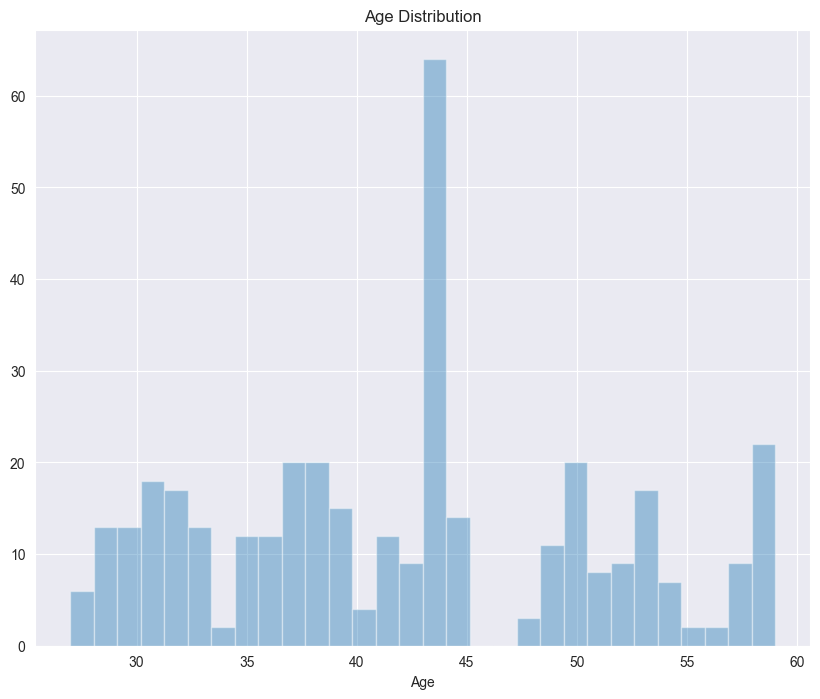

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Sleep Duration'], bins=30, kde=False)


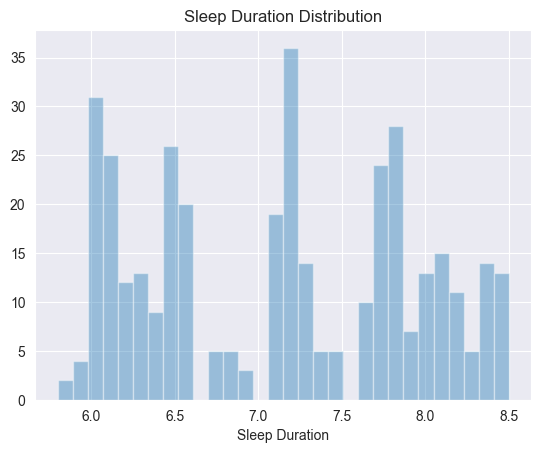

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Quality of Sleep'], bins=30, kde=False)


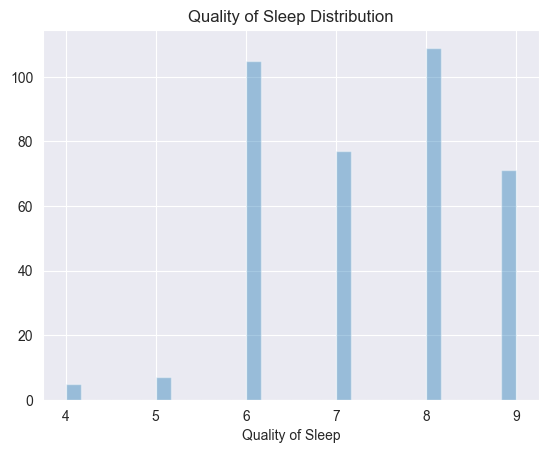

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Physical Activity Level'], bins=30, kde=False)


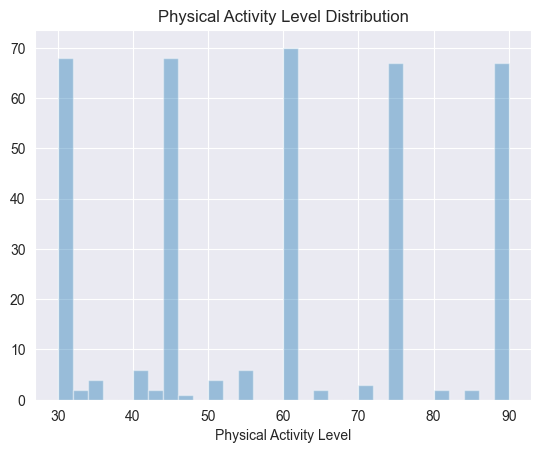

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Stress Level'], bins=30, kde=False)


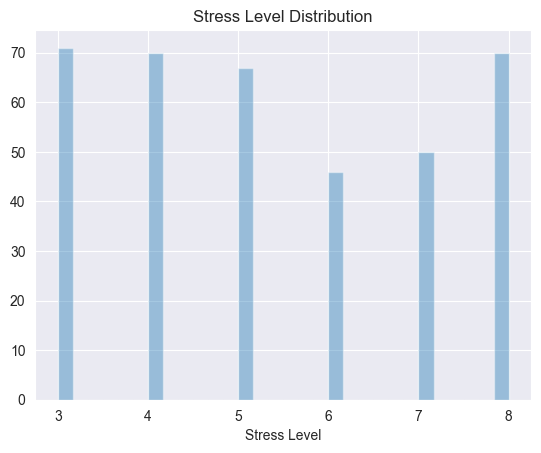

C:\Users\Xiaos\AppData\Local\Temp\ipykernel_13868\3526459198.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sleep['Heart Rate'], bins=30, kde=False)


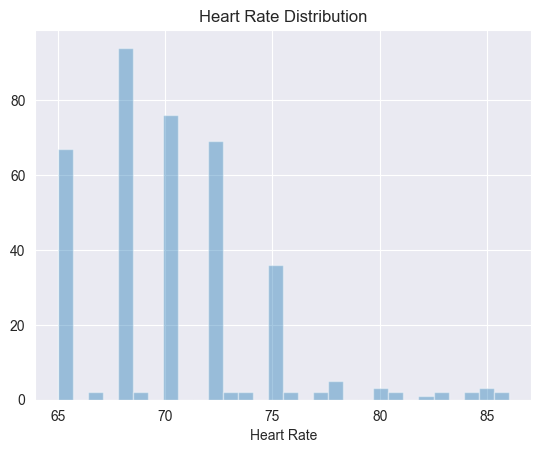

NameError: name 'data_sleep' is not defined

<Figure size 1000x800 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_sleep = pd.read_csv('sleep_health.csv')

# Plot distributions
plt.figure(figsize=(10, 8))
sns.distplot(df_sleep['Age'], bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

sns.distplot(df_sleep['Sleep Duration'], bins=30, kde=False)
plt.title('Sleep Duration Distribution')
plt.show()

sns.distplot(df_sleep['Quality of Sleep'], bins=30, kde=False)
plt.title('Quality of Sleep Distribution')
plt.show()

sns.distplot(df_sleep['Physical Activity Level'], bins=30, kde=False)
plt.title('Physical Activity Level Distribution')
plt.show()

sns.distplot(df_sleep['Stress Level'], bins=30, kde=False)
plt.title('Stress Level Distribution')
plt.show()

sns.distplot(df_sleep['Heart Rate'], bins=30, kde=False)
plt.title('Heart Rate Distribution')
plt.show()
# Using numpy and matplotlib for plotting
plt.figure(figsize=(10, 8))
plt.hist(data_sleep[:, 2], bins=30, alpha=0.7, label='Age')
plt.title('Age Distribution')
plt.show()

plt.hist(data_sleep[:, 5], bins=30, alpha=0.7, label='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.show()

plt.hist(data_sleep[:, 6], bins=30, alpha=0.7, label='Quality of Sleep')
plt.title('Quality of Sleep Distribution')
plt.show


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



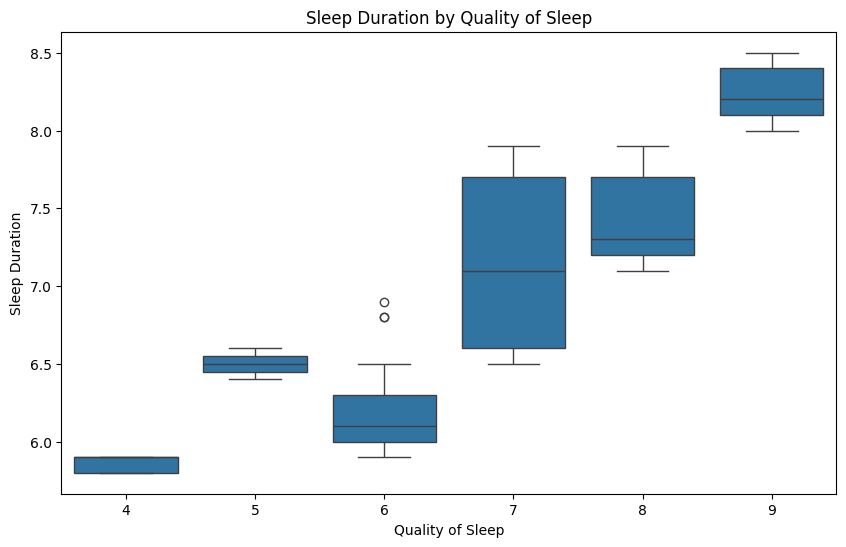

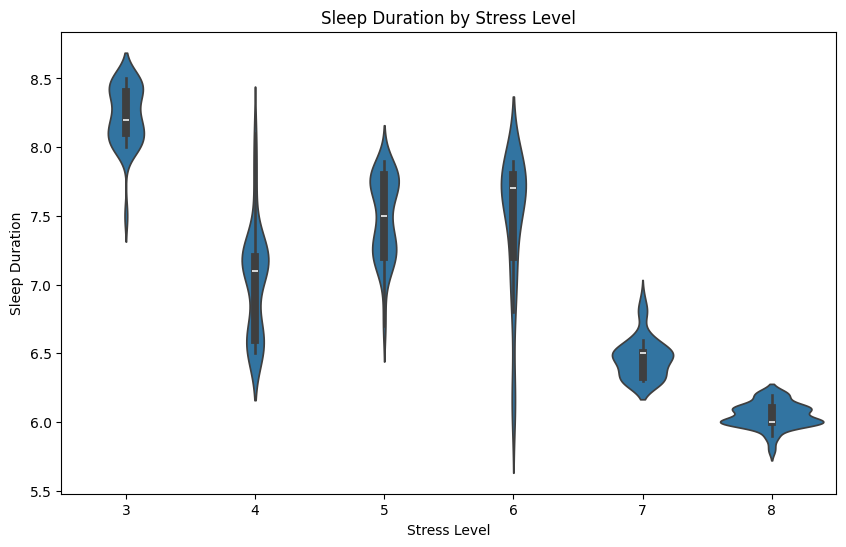

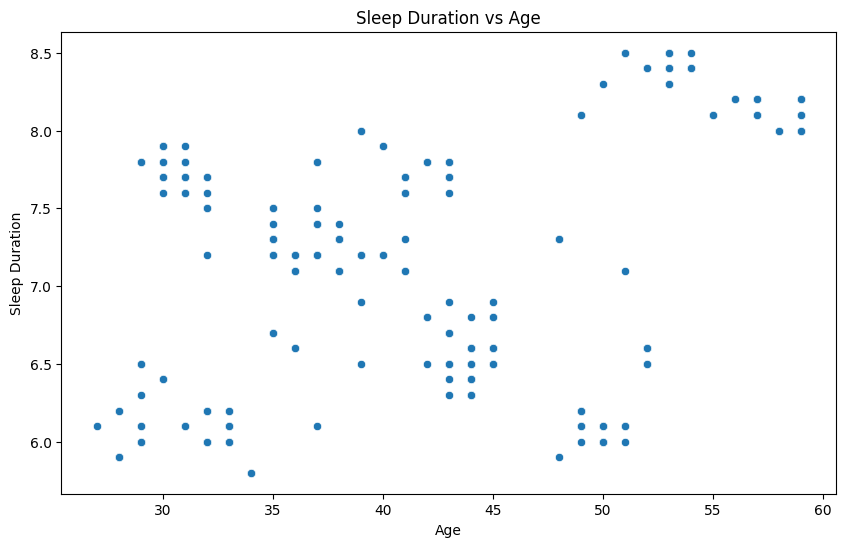

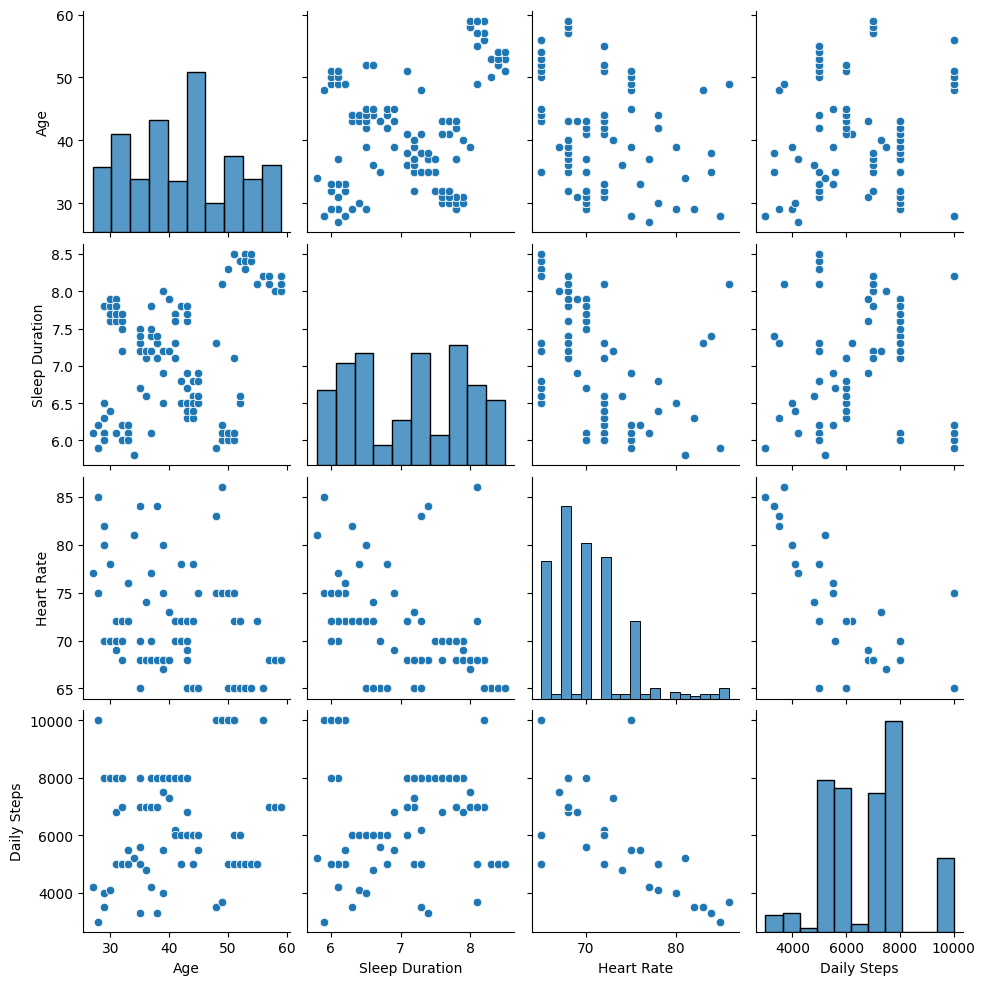

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_sleep = pd.read_csv('sleep_health.csv')

# Boxplot for Sleep Duration to show distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df_sleep)
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

# Violin plot for Sleep Duration to show distribution and density
plt.figure(figsize=(10, 6))
sns.violinplot(x='Stress Level', y='Sleep Duration', data=df_sleep)
plt.title('Sleep Duration by Stress Level')
plt.show()

# Scatter plot for Sleep Duration vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df_sleep)
plt.title('Sleep Duration vs Age')
plt.show()

# Pairplot for a few selected columns
sns.pairplot(df_sleep, vars=['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])
plt.show()

# Co